In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [25]:
# Load dataset
data = pd.read_csv("Flood_Prediction_Dataset.csv", encoding='latin1') 
print(data.head())

      District       City  Rainfall (mm)  Temperature (øC)  Humidity (%)  \
0   Monaragala     Bibile     187.270059         17.755623     61.422466   
1  Trincomalee  China Bay     475.357153         23.793952     74.874665   
2    Ratnapura   Kuruwita     365.996971         33.163676     70.534719   
3       Mannar    Pesalai     299.329242         30.312330     70.740824   
4       Mannar    Adampan      78.009320         34.383935     61.591602   

   Wind Speed (km/h)  Soil Moisture (%)  Elevation (m)  \
0          30.790651          18.996041     465.717114   
1          44.328633          50.000000     984.003459   
2          42.427244          32.054653     620.470568   
3          14.571280          24.365773     363.527196   
4          26.565824           5.000000    1008.265684   

   Proximity to River (km)  Flood Occurrence (Y)  
0                23.775214                     0  
1                 0.597465                     1  
2                 4.329831               

In [26]:
# dataset info
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   District                 1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Rainfall (mm)            1000 non-null   float64
 3   Temperature (øC)         1000 non-null   float64
 4   Humidity (%)             1000 non-null   float64
 5   Wind Speed (km/h)        1000 non-null   float64
 6   Soil Moisture (%)        1000 non-null   float64
 7   Elevation (m)            1000 non-null   float64
 8   Proximity to River (km)  1000 non-null   float64
 9   Flood Occurrence (Y)     1000 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 78.2+ KB
None


In [27]:
# Handle missing values
data.fillna(data.mean(numeric_only=True), inplace=True)

In [28]:
# Encode categorical variables
label_encoders = {}
for column in ["District", "City"]:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [29]:
# Features and target
X = data.drop(columns=["Flood Occurrence (Y)"])
y = data["Flood Occurrence (Y)"]

In [30]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
import joblib


joblib.dump(label_encoders, 'label_encoders.pkl')

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [32]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [33]:
# Predictions
y_pred = rf_model.predict(X_test_scaled)

In [34]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Model Evaluation:
Accuracy: 79.50%
Confusion Matrix:
[[117  11]
 [ 30  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       128
           1       0.79      0.58      0.67        72

    accuracy                           0.80       200
   macro avg       0.79      0.75      0.76       200
weighted avg       0.79      0.80      0.79       200



In [35]:
# Save the trained model (optional)
import joblib
joblib.dump(rf_model, "flood_prediction_model.pkl")
print("Trained model saved as flood_prediction_model.pkl")

Trained model saved as flood_prediction_model.pkl


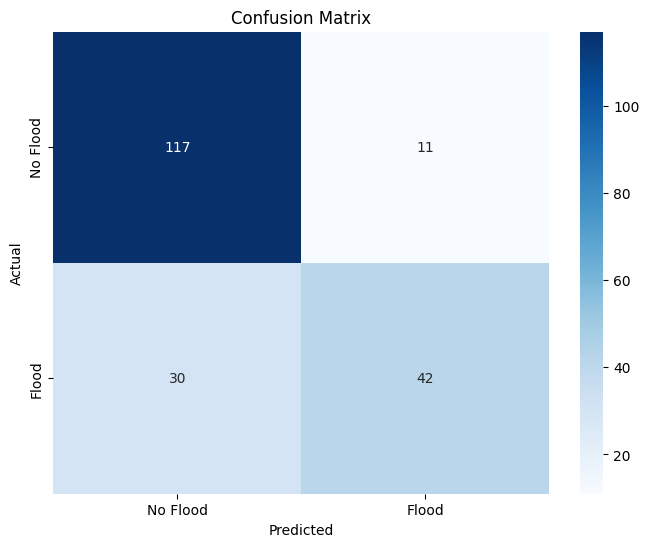

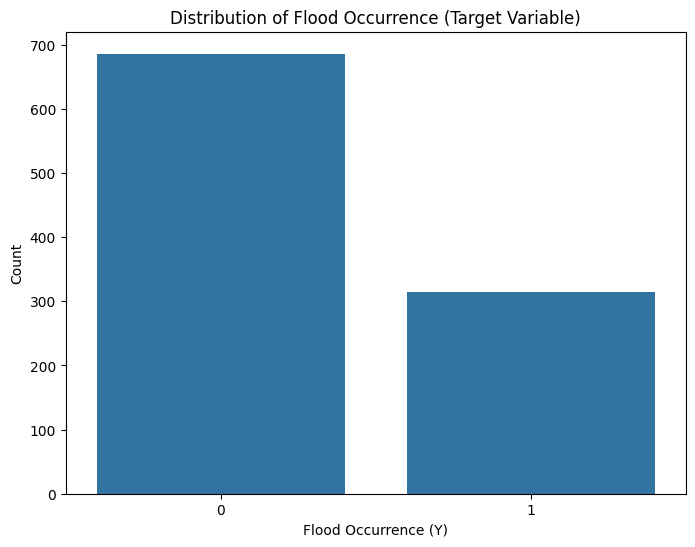

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualization - Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Flood Occurrence (Target Variable)')
plt.xlabel('Flood Occurrence (Y)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Load the saved model
model = joblib.load("flood_prediction_model.pkl")
print("Model loaded successfully.")

# Manual input function
def get_user_input():
    district = input("District: ")
    city = input("City: ")
    rainfall = float(input("Rainfall (in mm): "))
    temperature = float(input("Temperature (in °C): "))
    humidity = float(input("Humidity (as a percentage): "))
    wind_speed = float(input("Wind Speed (in km/h): "))
    soil_moisture = float(input("Soil Moisture (%): "))
    elevation  = float(input("Elevation (m): "))
    proximity_to_River = float(input("Proximity to River (km): "))

    # Encode categorical variables
    if "District" in label_encoders and "City" in label_encoders:
        district_encoded = label_encoders["District"].transform([district])[0]
        city_encoded = label_encoders["City"].transform([city])[0]
    else:
        raise ValueError("Label encoders for District and City are missing. Make sure you trained the model with these encoders.")

    # Combine input into a single array
    input_data = np.array([[district_encoded, city_encoded, rainfall, temperature, humidity, wind_speed, soil_moisture, elevation, proximity_to_River]])
    
    # Scale numerical features
    input_data_scaled = scaler.transform(input_data)
    
    return input_data_scaled

# Make prediction
try:
    user_data = get_user_input()
    prediction = model.predict(user_data)
    prediction_proba = model.predict_proba(user_data)

    # Output result
    if prediction[0] == 1:
        print("\nPrediction: Flood is likely.")
    else:
        print("\nPrediction: No flood is likely.")
    print(f"Confidence: {prediction_proba[0][prediction[0]] * 100:.2f}%")
except Exception as e:
    print(f"Error: {e}")


Model loaded successfully.
Enter the following details for prediction:

Prediction: Flood is likely.
Confidence: 60.00%


c:\Users\Ash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
